#Youtube Analysis


In [ ]:
from datetime import datetime, timedelta, time 
flag=0
ip= input("Today (0),This Week (1),This Month (2),This Year (3),None (4):")
sd=None
ed=None
try :
  ip=int(ip)
except:
  ip=ip
if ip == 0:
  sd=datetime.now()
  ed=datetime.now()
elif ip == 1:
  today = datetime.now().date()
  sd= today - timedelta(days=today.weekday())
  sd=datetime.combine(sd, time(0, 0))
  #sd=datetime.today().replace(day=1)
  ed=datetime.now()
elif ip == 2:
  sd=datetime.today().replace(day=1)
  ed=datetime.now()
elif ip == 3:
  sd=datetime.today().replace(day=1,month=1)
  ed=datetime.now()
else:
  flag=1
try :
  print("Start Date :"+sd.strftime("%d-%m-%Y"))
  print("End Date :"+ed.strftime("%d-%m-%Y"))
except:
  print("No Start and End Time Specified as of Now")

Today (0),This Week (1),This Month (2),This Year (3),None (4):2
Start Date :01-11-2020
End Date :20-11-2020


In [ ]:
from datetime import datetime, timedelta, time
try:
    flag
except NameError:
  ip=3
  print("Enter in Format of dd-mm-yyyy\n")
  sd = input("Enter Start Date:")
  ed = input("Enter End Date:")
  try:
    sd = datetime.strptime(sd, '%d-%m-%Y')
  except:
    sd = datetime.now()
  try:
    ed = datetime.strptime(sd, '%d-%m-%Y')
  except:
    ed = datetime.now()

  print("Start Date :"+sd.strftime("%d-%m-%Y"))
  print("End Date :"+ed.strftime("%d-%m-%Y"))    
else:
  if flag == 1:
    print("Enter in Format of dd-mm-yyyy\n")
    sd = input("Enter Start Date:")
    ed = input("Enter End Date:")
    try:
      sd = datetime.strptime(sd, '%d-%m-%Y')
    except:
      sd = datetime.now()
    try:
      ed = datetime.strptime(sd, '%d-%m-%Y')
    except:
      ed = datetime.now()
    ip=3

  print("Start Date :"+sd.strftime("%d-%m-%Y"))
  print("End Date :"+ed.strftime("%d-%m-%Y"))


Start Date :01-11-2020
End Date :20-11-2020


In [ ]:
import json
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.dates as mdates
from datetime import datetime, timedelta, time
from scipy.ndimage.filters import gaussian_filter1d
import traceback

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Watch History Analysis

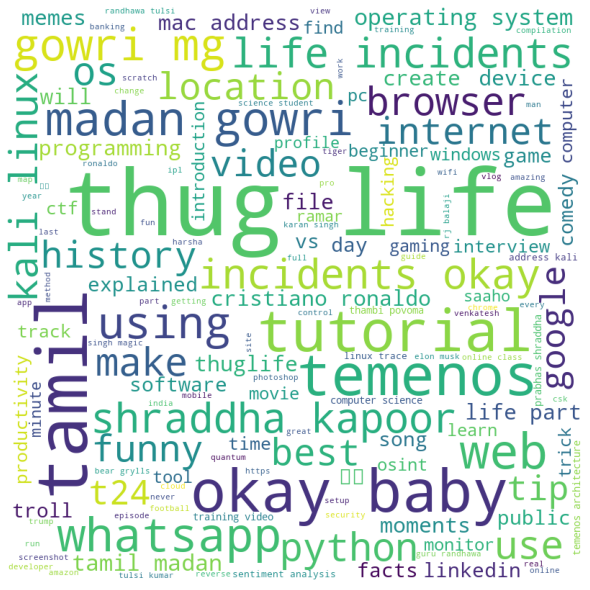

In [ ]:
# Get this file from takeout.google.com
# To speed up the process, only select "Google Chrome"
# and within "Google Chrome" only select "Browser History".
# This file should be ready in a couple minutes
with open(r'/content/drive/My Drive/Internet_History_Analysis_Data/watch-history.json', encoding='utf8') as file:
    data = json.load(file)

temp=[]
for entry in data:
  v=entry['time']
  try:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%S.%fZ')
  except:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%SZ')
  if  v > ed :
      continue
  if (not (v >= sd and v <= ed )):
      break
  temp.append(entry)
data=temp

comment_words = '' 
stopwords = set(STOPWORDS) 
#print(type(stopwords))
stopwords.add('Watched')
stopwords.add('Visited')
# iterate through the csv file 
for entry in data:
    val = entry['title']
    #print(val)
    # typecaste each val to string 
    val = str(val)
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

    

# Search History Analysis

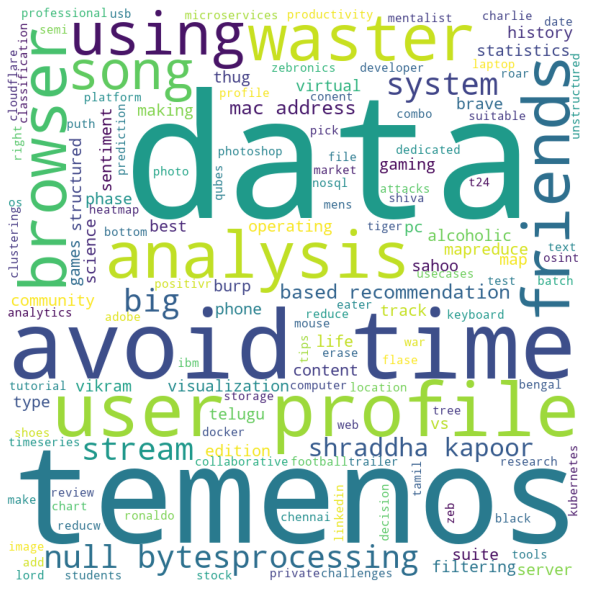

In [ ]:
# Get this file from takeout.google.com
# To speed up the process, only select "Google Chrome"
# and within "Google Chrome" only select "Browser History".
# This file should be ready in a couple minutes
with open(r'/content/drive/My Drive/Internet_History_Analysis_Data/search-history.json', encoding='utf8') as file:
    data = json.load(file)
temp=[]
for entry in data:
  v=entry['time']
  try:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%S.%fZ')
  except:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%SZ')
  if  v > ed :
      continue
  if (not (v >= sd and v <= ed )):
      break
  temp.append(entry)
data=temp


comment_words = '' 
stopwords = set(STOPWORDS) 
#print(type(stopwords))
stopwords.add('Searched')
#stopwords.add('Visited')
# iterate through the csv file 
for entry in data:
    val = entry['title']
    #print(val)
    # typecaste each val to string 
    val = str(val)
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                   
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

    

In [ ]:
# Get this file from takeout.google.com
# To speed up the process, only select "Google Chrome"
# and within "Google Chrome" only select "Browser History".
# This file should be ready in a couple minutes
with open(r'/content/drive/My Drive/Internet_History_Analysis_Data/search-history.json', encoding='utf8') as file:
    data1 = json.load(file)
with open(r'/content/drive/My Drive/Internet_History_Analysis_Data/watch-history.json', encoding='utf8') as file:
    data2 = json.load(file)

temp=[]
for entry in data1:
  v=entry['time']
  try:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%S.%fZ')
  except:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%SZ')
  if  v > ed :
      continue
  if (not (v >= sd and v <= ed )):
      break
  temp.append(entry)
for entry in data2:
  v=entry['time']
  try:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%S.%fZ')
  except:
      v=datetime.strptime(v, '%Y-%m-%dT%H:%M:%SZ')
  if  v > ed :
      continue
  if (not (v >= sd and v <= ed )):
      break
  temp.append(entry)  
data=temp
times = []
# Histogram of when sites are loaded. 
# This shows most/least active time of day
daily_minute = [0] * 1440
day_of_week = [0] * 7
# Number of visits for each day
daily_visits = {}
for entry in data: 
    val = entry['time']

    #print(val)
    # Average time of day
    try:
      val=datetime.strptime(val, '%Y-%m-%dT%H:%M:%S.%fZ')
    except:
      val=datetime.strptime(val, '%Y-%m-%dT%H:%M:%SZ')
    times.append(val)
    time_idx = val.hour*60 + val.minute
    daily_minute[time_idx] += 1

    # Weekly usage
    day_of_week[val.weekday()] += 1
    
    # Number of webpages per day
    day_idx = val.strftime('%Y-%m-%d')
    if day_idx in daily_visits.keys():
        daily_visits[day_idx] += 1
    else:
        daily_visits[day_idx] = 1

# Daily Activity

You Watched and Searched 351  in the last 18 days!
That's 19 Watch&Search per day

Your most active days were:
	1) 2020-11-09 with 65 Watch&Search
	2) 2020-11-19 with 35 Watch&Search
	3) 2020-11-02 with 31 Watch&Search
	4) 2020-11-15 with 26 Watch&Search
	5) 2020-11-05 with 26 Watch&Search


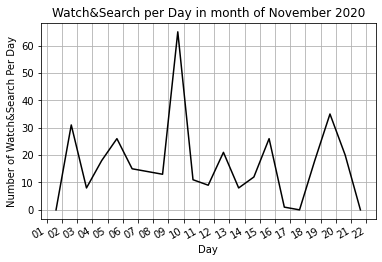

In [ ]:
%matplotlib inline
daily = dict(daily_visits)
sorted_visits = sorted(daily.items(), key=lambda x:x[1], reverse=True)

total = 0
for day in sorted_visits:
    total += day[1]
ave = int(total / len(sorted_visits))
print('You Watched and Searched {}  in the last {} days!'.format(len(data), len(sorted_visits)))
print('That\'s {} Watch&Search per day'.format(ave))
print()
print("Your most active days were:")
try :
  for i in range(5):
      print("\t{}) {} with {} Watch&Search".format(str(i+1), sorted_visits[i][0], sorted_visits[i][1]))
except :
  print()
if ip==3:
  try :
      start_day = datetime.strptime(list(daily.items())[-1][0], '%Y-%m-%d')
      end_day = datetime.strptime(list(daily.items())[0][0], '%Y-%m-%d')
      start_day=sd
      end_day=ed
      #print(start_day)
      #print(end_day)
      date_list = mdates.drange(start_day, end_day+timedelta(days=1), timedelta(days=1))
      for date in date_list:
          if not mdates.num2date(date).strftime('%Y-%m-%d') in daily.keys():
              daily[mdates.num2date(date).strftime('%Y-%m-%d')] = 0

      sorted_visits = sorted(daily.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d'), reverse=False)
      #print(sorted_visits)
      plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b '%y"))
      plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
      plt.gca().axes.set_ylabel('Number of Watch&Search Per Day')
      plt.gca().axes.set_xlabel('Day')
      plt.title('Watch&Search per Day')

      visits = [x[1] for x in sorted_visits]
      #print(visits)
      visits_smoothed = gaussian_filter1d(visits, sigma=12)
      #print(visits_smoothed)
      plt.plot(date_list, visits_smoothed, '-', color='black')
      plt.gcf().autofmt_xdate()
      plt.grid()
      plt.show()
  except Exception as e: 
      #print(e)
      traceback.print_exc()
      print("Sorry Cannot Able to Plot the Graph within given Date range !!")
else:
  try :
      start_day = datetime.strptime(list(daily.items())[-1][0], '%Y-%m-%d')
      end_day = datetime.strptime(list(daily.items())[0][0], '%Y-%m-%d')
      start_day=sd
      end_day=ed
      #print(start_day)
      #print(end_day)
      date_list = mdates.drange(start_day, end_day+timedelta(days=1), timedelta(days=1))
      for date in date_list:
          if not mdates.num2date(date).strftime('%Y-%m-%d') in daily.keys():
              daily[mdates.num2date(date).strftime('%Y-%m-%d')] = 0

      sorted_visits = sorted(daily.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d'), reverse=False)
      #print(sorted_visits)
      if ip==1:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b"))
        plt.title('Watch&Search per Day')
      elif ip==2:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d"))
        now = datetime.now()
        plt.title("Watch&Search per Day in month of %s" % (now.strftime('%B %Y')))


      plt.gca().xaxis.set_major_locator(mdates.DayLocator())
      plt.gca().axes.set_ylabel('Number of Watch&Search Per Day')
      plt.gca().axes.set_xlabel('Day')
      

      visits = [x[1] for x in sorted_visits]
      #print(visits)
      #visits_smoothed = gaussian_filter1d(visits, sigma=12)
      #print(visits_smoothed)
      plt.plot(date_list, visits, '-', color='black')
      plt.gcf().autofmt_xdate()
      plt.grid()
      plt.show()
  except Exception as e: 
      #print(e)
      traceback.print_exc()
      print("Sorry Cannot Able to Plot the Graph within given Date range !!")

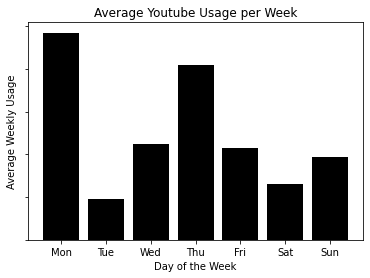

It looks like you're most active on Mon and least active on Tue


In [ ]:
xlabs = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(7),xlabs)
plt.gca().axes.set_yticklabels([])
plt.gca().axes.set_ylabel('Average Weekly Usage')
plt.gca().axes.set_xlabel('Day of the Week')
plt.title('Average Youtube Usage per Week')
plt.bar(range(7), day_of_week, color='black');
# plt.gcf().autofmt_xdate()
# plt.grid()
plt.show()

max_index = day_of_week.index(max(day_of_week))
min_index = day_of_week.index(min(day_of_week))
print('It looks like you\'re most active on {} and least active on {}'
      .format(xlabs[max_index], xlabs[min_index]))

# Average Daily Usage

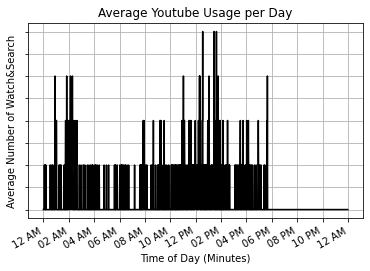

It looks like you're most active around 12:12 PM and least active around 12:12 AM
Can be Accurately It looks like you're most active around 12:33 and least active around 00:00


In [ ]:
start_time = datetime(12, 12, 12, 0, 0)
#print(start_time)
end_time = start_time + timedelta(hours=24)
time_list = mdates.drange(start_time, end_time, timedelta(minutes=1))
hour_list = mdates.drange(start_time, end_time+timedelta(hours=1), timedelta(hours=2))
if ip==3:
  daily_minute_smoothed = gaussian_filter1d(daily_minute, sigma=14)
else :
  daily_minute_smoothed = daily_minute
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))
plt.xticks(hour_list)
plt.gca().axes.set_yticklabels([])
plt.gca().axes.set_ylabel('Average Number of Watch&Search')
plt.gca().axes.set_xlabel('Time of Day (Minutes)')
plt.title('Average Youtube Usage per Day')
plt.plot(time_list, daily_minute_smoothed, '-', color='black');
plt.gcf().autofmt_xdate()
plt.grid()
plt.show()
max_index = list(daily_minute_smoothed).index(max(daily_minute_smoothed))
min_index = list(daily_minute_smoothed).index(min(daily_minute_smoothed))
most_active = (mdates.num2date(time_list[max_index]).strftime('%I:%m %p'))
least_active = (mdates.num2date(time_list[min_index]).strftime('%I:%m %p'))
print('It looks like you\'re most active around {} and least active around {}'
      .format(most_active, least_active))
most_active = '{:02d}:{:02d}'.format(*divmod(max_index, 60))
least_active = '{:02d}:{:02d}'.format(*divmod(min_index, 60))
print('Can be Accurately It looks like you\'re most active around {} and least active around {}'
      .format(most_active, least_active))
